## Machine Problem #1: Thomson Problem

by: Christian Jay P. Magsigay

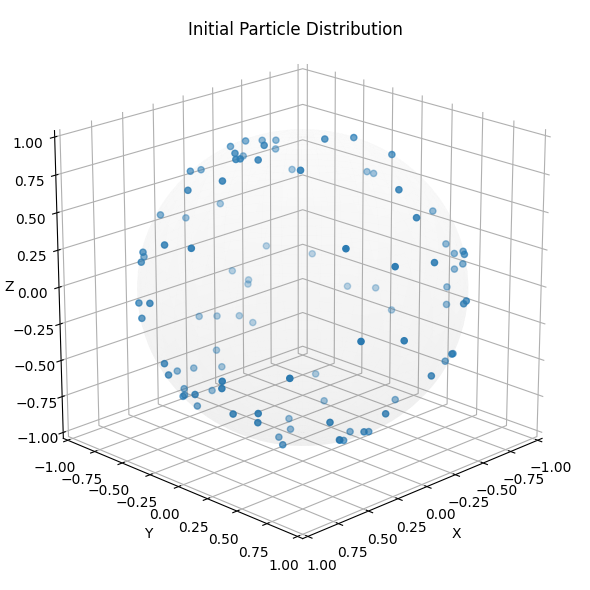

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100 # Number of particles
k = 9e9  # Coulomb's constant 1/(4πε_0) in N m^2 C^-2
e = 1.602e-19  # charge in C
m = 9.11e-31  # electron mass in kg
T = 10  # Total simulation time in s
dt = 0.01  # Timestep in s

# Normalizes the input array
def normalize(a):
    for i in range(N):
        a[i] = a[i] / np.linalg.norm(a[i])
    return a

# Generate N particles on the surface of a unit sphere
def generate_particles_on_sphere():
    u = np.random.normal(0, 1, 3)
    return u / np.linalg.norm(u)

r = np.zeros([N, 3])
for i in range(N):
    u = generate_particles_on_sphere()
    r[i] = u

# Function to calculate electric forces between particles using Coulomb's law
def calculate_electric_force(r):
    F = np.zeros([N, 3])
    for i in range(N):
        f = np.zeros(3)
        for j in range(N):
            if i != j:
                r_diff = r[i] - r[j]
                f_new = k * e * e * r_diff / (np.linalg.norm(r_diff)) ** 3
                f = f + f_new
        F[i] = f
    return F

# Display the initial distribution of the particles on the unit sphere
def plot(r,title):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Set plot parameters
    ax.scatter(r[:, 0], r[:, 1], r[:, 2])
    limits = [-1, 1]
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.set_zlim(limits)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z', labelpad=1)

    # Set title and grid
    ax.set_title(title, pad=15, y=1)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

    # Remove background grid lines
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('white')
    ax.yaxis.pane.set_edgecolor('white')
    ax.zaxis.pane.set_edgecolor('white')
    ax.xaxis.pane.set_alpha(1)
    ax.yaxis.pane.set_alpha(1)
    ax.zaxis.pane.set_alpha(1)

    # Adjust viewing angle
    ax.view_init(elev=20, azim=45)
    ax.set_box_aspect([1, 1, 0.95]) 
    
    # Create a sphere with low opacity
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='white', alpha=0.05)

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot(r,'Initial Particle Distribution')

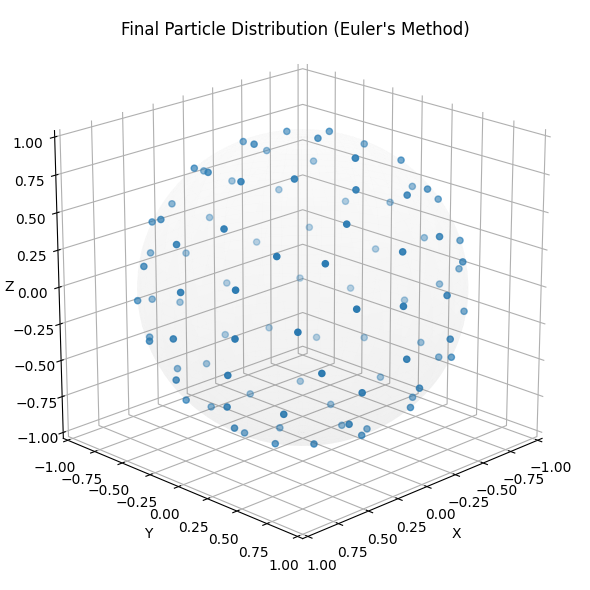

In [8]:
# Performing the simulation using the Euler method

def euler_method_simulation():
    v0 = 0.25  # Initial velocity of the particles
    t_int = np.arange(0, T + dt, dt)  # Time interval
    n = len(t_int)  # Number of steps

    # Arrays to store positions and velocities for Euler method    
    arrays = []
    for i in range(6):
        arrays.append(np.zeros([n, N]))
    x, y, z, vx, vy, vz = arrays

    # Initial conditions
    R = r
    x[0],y[0],z[0] = R[:, 0],R[:, 1],R[:, 2]
    vx[0],vy[0],vz[0] = v0,v0,v0


    # Euler method simulation
    for j in range(N):
        # Calculate electric forces
        f = calculate_electric_force(R)

        # Update velocities
        vx[j + 1] = vx[j] + (f[:, 0] / m) * dt
        vy[j + 1] = vy[j] + (f[:, 1] / m) * dt
        vz[j + 1] = vz[j] + (f[:, 2] / m) * dt

        # Update positions
        x[j + 1] = x[j] + vx[j] * dt
        y[j + 1] = y[j] + vy[j] * dt
        z[j + 1] = z[j] + vz[j] * dt

        R[:, 0] = x[j + 1]
        R[:, 1] = y[j + 1]
        R[:, 2] = z[j + 1]
        R = normalize(R)

    # Display the final distribution of particles after the Euler simulation
    plot(R,'Final Particle Distribution (Euler\'s Method)')

# Run the simulations
euler_method_simulation()

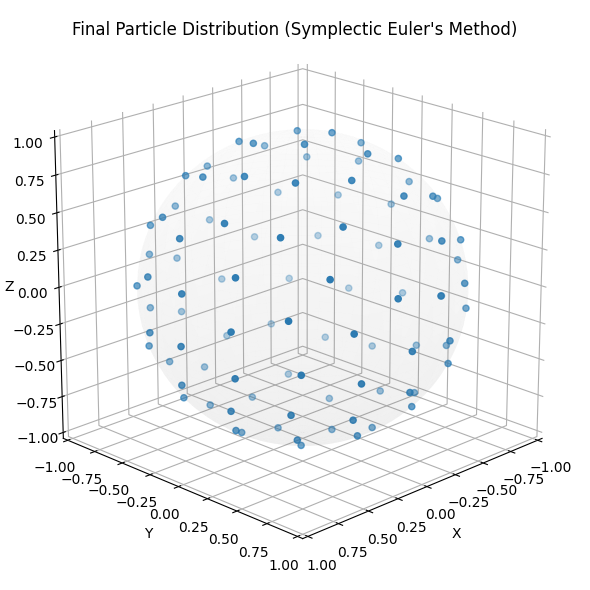

In [9]:
# Performing the simulation using the Symplectic Euler method 
#(similar to Euler method but with better energy conservation)

def symplectic_euler_method_simulation():
    v0 = 0.25  # Initial velocity of the particles
    t_int = np.arange(0, T + dt, dt)  # Time interval
    n = len(t_int)  # Number of steps

    # Arrays to store positions and velocities for Euler method    
    arrays = []
    for i in range(6):
        arrays.append(np.zeros([n, N]))
    x, y, z, vx, vy, vz = arrays

    # Initial conditions
    R = r
    x[0],y[0],z[0] = R[:, 0],R[:, 1],R[:, 2]
    vx[0],vy[0],vz[0] = v0,v0,v0


    # Symplectic Euler method simulation
    for j in range(N):
        # Calculate electric forces
        f = calculate_electric_force(R)

        # Update velocities
        vx[j + 1] = vx[j] + (f[:, 0] / m) * dt
        vy[j + 1] = vy[j] + (f[:, 1] / m) * dt
        vz[j + 1] = vz[j] + (f[:, 2] / m) * dt

        # Update positions
        x[j + 1] = x[j] + vx[j+1] * dt
        y[j + 1] = y[j] + vy[j+1] * dt
        z[j + 1] = z[j] + vz[j+1] * dt

        R[:, 0] = x[j + 1]
        R[:, 1] = y[j + 1]
        R[:, 2] = z[j + 1]
        R = normalize(R)

    # Display the final distribution of particles after the Symplectic Euler simulation
    plot(R,'Final Particle Distribution (Symplectic Euler\'s Method)')

# Run the simulations
symplectic_euler_method_simulation()

## Animating the evolution of the distribution

102it [06:38,  3.91s/it]                                                                                               


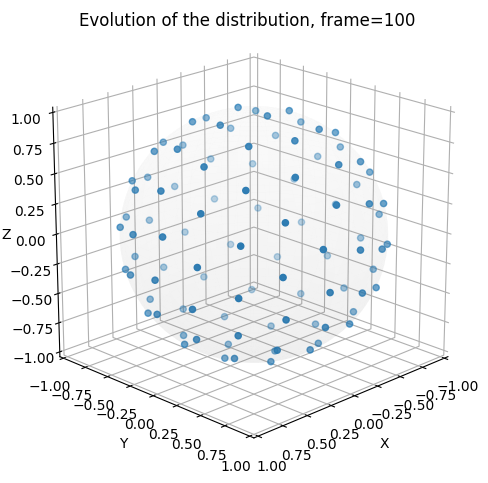

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import tqdm

# Perform the simulation using the Symplectic Euler method
def symplectic_euler_method_simulation(frame):
    v0 = 0.25  # Initial velocity of the particles
    t_int = np.arange(0, T + dt, dt)  # Time interval
    n = len(t_int)  # Number of steps

    # Arrays to store positions and velocities for Euler method    
    arrays = []
    for i in range(6):
        arrays.append(np.zeros([n, N]))
    x, y, z, vx, vy, vz = arrays

    # Initial conditions
    R = r
    x[0],y[0],z[0] = R[:, 0],R[:, 1],R[:, 2]
    vx[0],vy[0],vz[0] = v0,v0,v0


    # Symplectic Euler method simulation
    for j in range(frame):
        # Calculate electric forces
        f = calculate_electric_force(R)

        # Update velocities
        vx[j + 1] = vx[j] + (f[:, 0] / m) * dt
        vy[j + 1] = vy[j] + (f[:, 1] / m) * dt
        vz[j + 1] = vz[j] + (f[:, 2] / m) * dt

        # Update positions
        x[j + 1] = x[j] + vx[j+1] * dt
        y[j + 1] = y[j] + vy[j+1] * dt
        z[j + 1] = z[j] + vz[j+1] * dt

        R[:, 0] = x[j + 1]
        R[:, 1] = y[j + 1]
        R[:, 2] = z[j + 1]
        R = normalize(R)
        
    return R


#Plotting Preferences:

# Create initial figure and axes for the animation
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Set plot parameters
limits = [-1, 1]
ax.set_xlim(limits)
ax.set_ylim(limits)
ax.set_zlim(limits)
scatter = ax.scatter([], [], [])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z', labelpad=1)

# Set title and grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Remove background grid lines
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)

# Adjust viewing angle
ax.view_init(elev=20, azim=45)
ax.set_box_aspect([1, 1, 0.95]) 

# Create a sphere with low opacity
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='white', alpha=0.05)


# Update function for the animation
def update(frame):
    title = ax.set_title('Evolution of the distribution, frame={}'.format(frame), pad=15, y=1)
    R = symplectic_euler_method_simulation(frame)
    scatter._offsets3d = (R[:, 0], R[:, 1], R[:, 2])
    return scatter,

# Create animation using FuncAnimation
with tqdm.tqdm(total=N + 1) as pbar:
    def update_with_progress(frame):
        update(frame)
        pbar.update(1)
    animation = FuncAnimation(fig, update_with_progress, frames=range(N + 1), interval=100, blit=False)
    animation.save('Thomson_Problem.mp4')

plt.show()

